<a href="https://colab.research.google.com/github/charita-dotcom/colab/blob/main/VAE_IDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"charitachalla","key":"30d93976971cdd0286600cf17a0148dc"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download the NSL KDD dataset through kaggle API
!kaggle datasets download -d hassan06/nslkdd
!unzip "nslkdd.zip"

Dataset URL: https://www.kaggle.com/datasets/hassan06/nslkdd
License(s): unknown
Archive:  nslkdd.zip
  inflating: KDDTest+.arff           
  inflating: KDDTest+.txt            
  inflating: KDDTest-21.arff         
  inflating: KDDTest-21.txt          
  inflating: KDDTest1.jpg            
  inflating: KDDTrain+.arff          
  inflating: KDDTrain+.txt           
  inflating: KDDTrain+_20Percent.arff  
  inflating: KDDTrain+_20Percent.txt  
  inflating: KDDTrain1.jpg           
  inflating: index.html              
  inflating: nsl-kdd/KDDTest+.arff   
  inflating: nsl-kdd/KDDTest+.txt    
  inflating: nsl-kdd/KDDTest-21.arff  
  inflating: nsl-kdd/KDDTest-21.txt  
  inflating: nsl-kdd/KDDTest1.jpg    
  inflating: nsl-kdd/KDDTrain+.arff  
  inflating: nsl-kdd/KDDTrain+.txt   
  inflating: nsl-kdd/KDDTrain+_20Percent.arff  
  inflating: nsl-kdd/KDDTrain+_20Percent.txt  
  inflating: nsl-kdd/KDDTrain1.jpg   
  inflating: nsl-kdd/index.html      


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import LabelEncoder
from sklearn.preprocessing   import StandardScaler
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras import (
    layers,
    models,
    datasets,
    callbacks,
    losses,
    optimizers,
    metrics,
    regularizers,
    initializers
)
from keras import backend as K
from tensorflow.keras.metrics import MeanSquaredLogarithmicError

In [ ]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

#load train and test set
df_train=pd.read_csv('nsl-kdd/KDDTrain+.txt',header=None,names=columns)
df_test=pd.read_csv('nsl-kdd/KDDTest+.txt',header=None,names=columns)

In [ ]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
#check for null values in train set
df_train.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
#check for duplicates in train set
df_train.duplicated().sum()

np.int64(0)

In [ ]:
df_train['attack'].value_counts()

,count
attack,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
#Eliminate all other classes to make this a binary classification task
df_train.attack=df_train.attack.apply(lambda x: 0 if x == 'normal' else 1)
df_test.attack=df_test.attack.apply(lambda x: 0 if x == 'normal' else 1)

In [ ]:
df_train['attack'].value_counts()

,count
attack,
0,67343
1,58630


In [ ]:
df_test['attack'].value_counts()

,count
attack,
1,12833
0,9711


In [ ]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21


In [ ]:
#Label encode categorical columns
def label_encoding(df):
    for column in df.columns:
        if df[column].dtype == object:
            encoded = LabelEncoder()

            encoded.fit(df[column])
            df[column] = encoded.transform(df[column])
    return df

In [ ]:
label_encoding(df_train)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,20
125969,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0,21
125970,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0,18
125971,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,20


In [ ]:
label_encoding(df_test)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,45,1,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,21
1,0,1,45,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,21
2,2,1,19,9,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0,21
3,0,0,13,9,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1,15
4,1,1,55,2,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0,21
22540,0,1,22,9,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0,21
22541,0,1,22,9,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1,15
22542,0,2,11,9,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0,21


In [ ]:
#train encoder with only normal data
normal_data = df_train[df_train['attack'] == 0]
abnormal_data = df_train[df_train['attack'] == 1]

In [ ]:
normal_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21
12,0,1,24,9,287,2251,0,0,0,0,...,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0,21


In [ ]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
VALIDATE_SIZE = 0.1
#10% of train data is considered as validation set
X_train, X_validate = train_test_split(normal_data,
                                       test_size=VALIDATE_SIZE,
                                       random_state=RANDOM_SEED)

In [ ]:
X_train= X_train.drop('attack', axis=1).values

In [ ]:
X_validate = X_validate.drop('attack', axis=1).values

In [ ]:
X_test, y_test = df_test.drop('attack', axis=1).values, df_test.attack.values

In [ ]:
print(f"""Shape of the datasets:
    training (rows, cols) = {X_train.shape}
    validate (rows, cols) = {X_validate.shape}
    holdout  (rows, cols) = {X_test.shape}""")

Shape of the datasets:
    training (rows, cols) = (60608, 42)
    validate (rows, cols) = (6735, 42)
    holdout  (rows, cols) = (22544, 42)


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler())])

In [ ]:
pipeline.fit(X_train);

In [ ]:
#scale the data using standard scaler
X_train_transformed = pipeline.transform(X_train)
X_validate_transformed = pipeline.transform(X_validate)

In [ ]:
#hyperparameters
input_dim = X_train_transformed.shape[1]
BATCH_SIZE = 128
EPOCHS = 100
EMBEDDING_DIM = 16
sigma_factor    = 1e-4
init_stddev     = 0.05
annealing_steps = 5000

In [ ]:
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim   = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    def compute_output_shape(self, input_shape):
        return input_shape[0]


In [ ]:
#custom regularizer that penalizes based on standard deviation
class SigmaRowRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, factor=1e-4):
        self.factor = factor

    def __call__(self, x):
        mu = tf.reduce_mean(x, axis=1, keepdims=True)
        variance = tf.reduce_mean(tf.square(x), axis=1, keepdims=True) - tf.square(mu)
        sigma = tf.sqrt(variance + 1e-8)
        return self.factor * tf.reduce_sum(sigma)

    def get_config(self):
        return {'factor': self.factor}

In [ ]:
initializer = initializers.RandomNormal(mean=0., stddev=init_stddev)
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import Regularizer
import tensorflow as tf

#combine custom regularizer with l1 and l2 regularizers as described in the base paper
class CombinedRegularizer(Regularizer):
    def __init__(self, reg1, reg2):
        self.reg1 = regularizers.get(reg1)
        self.reg2 = regularizers.get(reg2)
    def __call__(self, x):
        return self.reg1(x) + self.reg2(x)
    def get_config(self):
        return {
            "reg1": regularizers.serialize(self.reg1),
            "reg2": regularizers.serialize(self.reg2),
        }

l1_l2 = regularizers.l1_l2(l1=1e-5, l2=1e-4)
sigma_reg = SigmaRowRegularizer(factor=sigma_factor)

kernel_reg = CombinedRegularizer(l1_l2, sigma_reg)

In [ ]:
# Encoder
encoder_input = layers.Input(
    shape=(input_dim, ), name="encoder_input"
)
x = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=initializer, kernel_regularizer=kernel_reg)(encoder_input)
x = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=initializer, kernel_regularizer=kernel_reg)(x)
x = tf.keras.layers.Dense(16, activation='relu', kernel_initializer=initializer, kernel_regularizer=kernel_reg)(x)

z_mean = layers.Dense(EMBEDDING_DIM, name="z_mean", kernel_initializer=initializer, kernel_regularizer=kernel_reg)(x)
z_log_var = layers.Dense(EMBEDDING_DIM, name="z_log_var", kernel_initializer=initializer, kernel_regularizer=kernel_reg)(x)
z = Sampling()([z_mean, z_log_var])

encoder = models.Model(encoder_input, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input       │ (None, 42)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 64)        │      2,752 │ encoder_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 32)        │      2,080 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 16)        │        528 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 16)        │        272 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 16)        │        272 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_2          │ (None, 16)        │          0 │ z_mean[0][0],     │
│ (Sampling)          │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,904 (23.06 KB)

 Trainable params: 5,904 (23.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Decoder
decoder_input = layers.Input(shape=(EMBEDDING_DIM,), name="decoder_input")
x = tf.keras.layers.Dense(16, activation='relu', kernel_initializer=initializer, kernel_regularizer=kernel_reg)(decoder_input)
x = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=initializer, kernel_regularizer=kernel_reg)(x)
x = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=initializer, kernel_regularizer=kernel_reg)(x)
decoder_output = layers.Dense(input_dim, kernel_initializer=initializer, kernel_regularizer=kernel_reg)(x)

decoder = models.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)      │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 42)             │         2,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,658 (22.10 KB)

 Trainable params: 5,658 (22.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#combined encoder and decoder model
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

        # loss functions used
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.recon_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

        self.reconstruction_loss_fn = tf.keras.losses.MeanSquaredLogarithmicError()

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.recon_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        return z_mean, z_log_var, reconstruction

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, reconstruction = self(data)
            reconstruction_loss = self.reconstruction_loss_fn(data, reconstruction)
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var
                                 - tf.square(z_mean)
                                 - tf.exp(z_log_var),
                              axis=1)
            )
            beta = 2.0
            kl_weight = beta * tf.minimum(1.0, self.optimizer.iterations / (annealing_steps))
            total_loss = reconstruction_loss + kl_weight * kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.recon_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.recon_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def test_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        z_mean, z_log_var, reconstruction = self(data)
        reconstruction_loss = self.reconstruction_loss_fn(data, reconstruction)
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + z_log_var
                             - tf.square(z_mean)
                             - tf.exp(z_log_var),
                          axis=1)
        )
        beta = 2.0
        kl_weight = beta * tf.minimum(1.0, self.optimizer.iterations / (annealing_steps))
        total_loss = reconstruction_loss + kl_weight * kl_loss

        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

In [ ]:
vae = VAE(encoder, decoder)

In [ ]:
from tensorflow.keras.optimizers import Nadam

#optimizer
optimizer = Nadam()
vae.compile(optimizer=optimizer)

In [ ]:
#save the best model weights
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath="./checkpoint/best_model.keras",
    save_weights_only=False,
    save_freq="epoch",
    monitor="loss",
    mode="min",
    save_best_only=True,
    verbose=1,
)
tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")

In [ ]:
#early stopping the training with patience 10
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6
)

In [ ]:
#train the model
vae.fit(
    X_train_transformed,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=True,
    validation_data=(X_validate_transformed, X_validate_transformed),
    callbacks=[model_checkpoint_callback, tensorboard_callback, early_stop, lr_scheduler]
)

Epoch 1/100
464/474 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - kl_loss: 5.6294e-04 - loss: 0.0689 - reconstruction_loss: 0.0689
Epoch 1: loss improved from inf to 0.06720, saving model to ./checkpoint/best_model.keras
474/474 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - kl_loss: 5.5458e-04 - loss: 0.0689 - reconstruction_loss: 0.0689 - val_kl_loss: 6.3377e-08 - val_loss: 0.0590 - val_reconstruction_loss: 0.0590 - learning_rate: 0.0010
Epoch 2/100
468/474 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - kl_loss: 4.3283e-08 - loss: 0.0664 - reconstruction_loss: 0.0664
Epoch 2: loss improved from 0.06720 to 0.06638, saving model to ./checkpoint/best_model.keras
474/474 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 4.3105e-08 - loss: 0.0664 - reconstruction_loss: 0.0664 - val_kl_loss: 2.9802e-08 - val_loss: 0.0590 - val_reconstruction_loss: 0.0590 - learning_rate: 0.0010
Epoch 3/100
464/474 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - kl_loss: 4.1254e-08 - loss: 0.0659 - reconstruction_loss: 0.0659
Epoch 3: loss improved from 0.0663

In [ ]:
X_test_transformed = pipeline.transform(X_test)

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Validation errors → min, max, any NaN: 0.4513522 5.6231604 False
Test errors       → min, max, any NaN: 0.32902429 5.835618 False
Unique labels in y_test: [0 1]


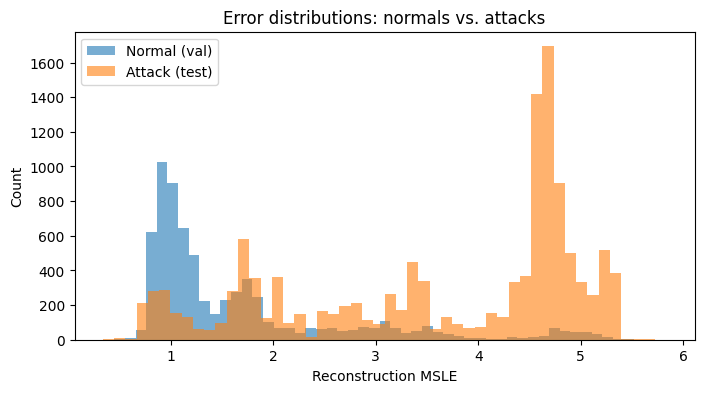

Optimal threshold (Youden’s J): 2.02826  (TPR=0.790, FPR=0.109)
Confusion matrix (tn, fp, fn, tp): 8648 1063 2700 10133
Accuracy : 0.8330819730305181
Precision: 0.9050553769203287
Recall   : 0.7896049248032416
F1-score : 0.8433975612801199


In [ ]:
#evaluate the model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import (
    roc_curve, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score
)
from tensorflow.keras.losses import MeanSquaredLogarithmicError

z_mean_val,  z_logvar_val,  recons_val  = vae.predict(X_validate_transformed)
z_mean_test, z_logvar_test, recons_test = vae.predict(X_test_transformed)

X_val_orig      = pipeline.inverse_transform(X_validate_transformed)
X_test_orig     = pipeline.inverse_transform(X_test_transformed)
recon_val_orig  = pipeline.inverse_transform(recons_val)
recon_test_orig = pipeline.inverse_transform(recons_test)

msle = MeanSquaredLogarithmicError(reduction=tf.keras.losses.Reduction.NONE)
errors_val  = msle(X_val_orig,   recon_val_orig).numpy().ravel()
errors_test = msle(X_test_orig,  recon_test_orig).numpy().ravel()

print("Validation errors → min, max, any NaN:", errors_val.min(), errors_val.max(), np.isnan(errors_val).any())
print("Test errors       → min, max, any NaN:", errors_test.min(), errors_test.max(), np.isnan(errors_test).any())
print("Unique labels in y_test:", np.unique(y_test))

plt.figure(figsize=(8,4))
plt.hist(errors_val, bins=50, alpha=0.6, label='Normal (val)')
plt.hist(errors_test[y_test==1], bins=50, alpha=0.6, label='Attack (test)')
plt.xlabel("Reconstruction MSLE")
plt.ylabel("Count")
plt.legend()
plt.title("Error distributions: normals vs. attacks")
plt.show()

#Use Youden's J to determine a threshold
fpr, tpr, thresholds = roc_curve(y_test, errors_test)
j_scores = tpr - fpr
best_idx  = np.argmax(j_scores)
best_thresh = thresholds[best_idx]
print(f"Optimal threshold (Youden’s J): {best_thresh:.5f}  (TPR={tpr[best_idx]:.3f}, FPR={fpr[best_idx]:.3f})")

preds = (errors_test > best_thresh).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
#print the confusion matrix and metrics calculated based on the confusion matrix
print("Confusion matrix (tn, fp, fn, tp):", tn, fp, fn, tp)
print("Accuracy :", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds, zero_division=0))
print("Recall   :", recall_score(y_test, preds, zero_division=0))
print("F1-score :", f1_score(y_test, preds, zero_division=0))